In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#!pip install git+https://github.com/automl/fanova
sns.set_style("dark")

/home/mcherti/miniconda/envs/databoard-env/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
from lightjob.cli import load_db
db = load_db()
experiments = list(db.all_jobs())

In [69]:
"""

from lightexperiments.light import Light
light = Light(config=dict(host='romeo1'))
light.launch()
experiments = light.db.find({"tags": ["deepconvnets", "zoonormalized"], 
                             #"model": {"$regex": "residual"},
                             "dataset": "Cifar10"})
experiments = list(experiments)
"""

'\n\nfrom lightexperiments.light import Light\nlight = Light(config=dict(host=\'romeo1\'))\nlight.launch()\nexperiments = light.db.find({"tags": ["deepconvnets", "zoonormalized"], \n                             #"model": {"$regex": "residual"},\n                             "dataset": "Cifar10"})\nexperiments = list(experiments)\n'

In [65]:
"""
from lightjob.cli import load_db
db = load_db()
for e in experiments:
    e_clean = e.copy()
    e_clean['start'] = str(e_clean['start'])
    e_clean['end'] = str(e_clean['end'])
    del e_clean['_id']
    db.add_job(e_clean)
"""

In [3]:
print("{:.2f} hours of experiments".format(sum((e['duration']) for e in experiments) / 3600.))
print("{:.2f} days of experiments".format(sum((e['duration']) for e in experiments) / (24*3600.)))
print("Number of experiments : {}".format(len(experiments)))

22222.88 hours of experiments
925.95 days of experiments
Number of experiments : 620


In [4]:
import pprint
import pandas as pd

for e in experiments:
    e["accuracy_train_last"] = e["accuracy_train"][-1]
    e["accuracy_valid_last"] = e["accuracy_valid"][-1]
    e['accuracy_train_first'] = e['accuracy_train'][0]
    e['accuracy_valid_max'] = np.max(e['accuracy_valid'])
#experiments  = filter(lambda e:e["accuracy_train_last"]>=0.9, experiments)                                

In [5]:
cols = [
 u'seed',
 u'accuracy_train_std',
 u'accuracy_valid_std',
 u'accuracy_test_std',
 u'accuracy_train',
 u'accuracy_valid',
 u'moving_var_accuracy_train',
 u'accuracy_train_last',
 u'accuracy_valid_last',
 u'accuracy_valid_max',
 u'loss_std',
 u'end',
 u'accuracy_test',
 #u'tags',
 u'hp',
 u'hp_model',
 u'loss_train',
 u'learning_rate'
 u'dataset',
 u'start',
 u'epoch',
 u'seed',
 u'error_valid',
 u'code_',
 u'_id',
 u'model',
 u'duration',
]
df = pd.DataFrame(experiments, columns=cols)
df

,seed,accuracy_train_std,accuracy_valid_std,accuracy_test_std,accuracy_train,accuracy_valid,moving_var_accuracy_train,accuracy_train_last,accuracy_valid_last,accuracy_valid_max,...,loss_train,learning_ratedataset,start,epoch,seed,error_valid,code_,_id,model,duration
0,1234,"[0.0592271499264, 0.0613727736921, 0.061455148...","[0.0567186581669, 0.0605461546998, 0.060012703...",0.060089,"[0.317371046687, 0.415239081325, 0.41580384036...","[0.318509615385, 0.406917735043, 0.40771901709...",NaN,0.415804,0.407719,0.407719,...,"[1.93070578575, 1.75187420845, 1.71397972107, ...",NaN,2016-01-16 21:12:51.065,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",1234,"[0.681490384615, 0.593082264957, 0.59228098290...",from datetime import datetime\nimport matplotl...,569ac99fc59f632d4b7168df,residual,4834.353858
1,1234,"[0.013592320495, 0.013589020236, 0.01337598589...","[0.0119139318118, 0.0125317540013, 0.013748532...",0.012544,"[0.097750376506, 0.0963149472892, 0.0950207078...","[0.0994698660714, 0.0980747767857, 0.097935267...","[0.000859962249636, 0.0014479900611, 0.0018311...",0.080172,0.076032,0.099470,...,"[2.30537652969, 2.30490970612, 2.30506038666, ...",NaN,2016-01-16 23:38:25.842,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",1234,"[0.900530133929, 0.901925223214, 0.90206473214...",from datetime import datetime\nimport matplotl...,569b5ab7c59f633ed18ab868,vgg,2036.576781
2,1234,"[0.0564533087331, 0.0636844247177, 0.061882128...","[0.0516068910654, 0.0632150093696, 0.060984647...",0.064319,"[0.301581325301, 0.504518072289, 0.50720067771...","[0.29500534188, 0.503205128205, 0.50186965812,...","[0.00818561661934, 0.0276186166777, 0.04146731...",0.507154,0.503072,0.503205,...,"[1.879997015, 1.56467270851, 1.49300348759, 1....",NaN,2016-01-17 07:51:28.980,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",1234,"[0.70499465812, 0.496794871795, 0.49813034188,...",from datetime import datetime\nimport matplotl...,569b5ab7c59f633ed18ab869,residual,7569.859985
3,1234,"[0.0275442990608, 0.0281282775409, 0.028923920...","[0.0266784209035, 0.0243263743695, 0.025960450...",0.030015,"[0.0928793298193, 0.0957737198795, 0.112622364...","[0.0894396551724, 0.0972521551724, 0.113011853...",NaN,0.130648,0.138335,0.146686,...,"[2.35850858688, 2.35634660721, 2.35591435432, ...",NaN,2016-01-16 21:19:21.319,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",1234,"[0.910560344828, 0.902747844828, 0.88698814655...",from datetime import datetime\nimport matplotl...,569b5ab7c59f633ed18ab86a,vgg,22194.458926
4,1234,"[0.0261964821427, 0.0261964821427, 0.026196482...","[0.0224538430108, 0.0224538430108, 0.022453843...",0.026409,"[0.100009412651, 0.100009412651, 0.10000941265...","[0.0988685344828, 0.0988685344828, 0.098868534...",NaN,0.101115,0.093750,0.098869,...,"[2.30413293839, 2.30304050446, 2.30287313461, ...",NaN,2016-01-16 21:18:51.508,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",1234,"[0.901131465517, 0.901131465517, 0.90113146551...",from datetime import datetime\nimport matplotl...,569b5ab7c59f633ed18ab86b,vgg,32672.749546
5,1234,"[0.0201000453794, 0.0197887407893, 0.019613705...","[0.0217353104716, 0.0205263555418, 0.020216411...",0.020917,"[0.129494540663, 0.130506400602, 0.13067112198...","[0.129175646552, 0.129714439655, 0.12971443965...","[0.00150919524553, 0.00260204293208, 0.0033524...",0.130671,0.129849,0.129849,...,"[2.30991339684, 2.30052876472, 2.29920172691, ...",NaN,2016-01-17 07:51:39.164,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",1234,"[0.870824353448, 0.870285560345, 0.87028556034...",from datetime import datetime\nimport matplotl...,569b5ab7c59f633ed18ab86c,residual,2882.580875
6,1234,"[0.0114950008403, 0.0115169944145, 0.011516994...","[0.00995902248749, 0.010053358384, 0.010053358...",0.014215,"[0.0917733433735, 0.091796875, 0.091796875, 0....","[0.087890625, 0.0880301339286, 0.0880301339286...","[0.000758011189855, 0.00129654903581, 0.001664...",0.091797,0.088030,0.088030,...,"[2.30276608467, 2.30282402039,

In [6]:
s = df["start"].min()
e = df["end"].max()
print(e - s)
print("First experiment : {}".format(s))
print("Last experiment : {}".format(e))

23 days 22:21:44.912000
First experiment : 2016-01-16 21:08:51.273000
Last experiment : 2016-02-09 19:30:36.185000


/home/mcherti/miniconda/envs/databoard-env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


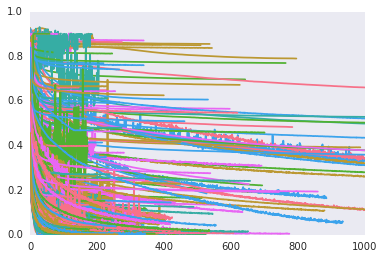

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
sns.set_palette("husl")
for i in range(len(df)):
    plt.plot(1 - np.array(df['accuracy_train'].iloc[i]))
    #plt.plot(df['error_valid'][i], label=i)
plt.legend()

In [8]:
from pprint import pprint
df_s = df.sort_values(by="accuracy_valid_max", ascending=False)
df_s.iloc[0:10]

,seed,accuracy_train_std,accuracy_valid_std,accuracy_test_std,accuracy_train,accuracy_valid,moving_var_accuracy_train,accuracy_train_last,accuracy_valid_last,accuracy_valid_max,...,loss_train,learning_ratedataset,start,epoch,seed,error_valid,code_,_id,model,duration
585,279703688,"[0.0157761140906, 0.0211705044693, 0.018368911...","[0.0230359772563, 0.0301594555297, 0.020393653...",0.009416,"[0.486627870928, 0.619455511432, 0.68689546131...","[0.480205489928, 0.627214914345, 0.68676610739...","[0.0213126016287, 0.0485037315401, 0.074049893...",0.999628,0.923072,0.927243,...,"[1.54606437683, 1.13017106056, 0.925799787045,...",NaN,2016-02-03 11:52:12.827,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",279703688,"[0.519794510072, 0.372785085655, 0.31323389260...",from datetime import datetime\nimport matplotl...,56b762d3c59f634f10b56a34,residualv3,345529.047164
362,960492231,"[0.0133228036693, 0.0163674688878, 0.014082404...","[0.0175777838329, 0.0134399594405, 0.017649242...",0.009303,"[0.282778109427, 0.492114140654, 0.44826976484...","[0.276580442865, 0.489359292639, 0.44147390342...","[0.0071967113254, 0.0258400128612, 0.035818497...",0.999977,0.923327,0.925189,...,"[1.8388903141, 1.35933566093, 1.15001964569, 1...",NaN,2016-01-29 16:05:49.094,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",960492231,"[0.723419557135, 0.510640707361, 0.55852609657...",from datetime import datetime\nimport matplotl...,56ae1c2cc59f6313e27b2423,residualv3,159422.187531
515,423058430,"[0.0218939495327, 0.0183454520192, 0.022683031...","[0.0101291539455, 0.0115828215827, 0.011134196...",0.008843,"[0.642998814715, 0.730223618032, 0.76546241982...","[0.632961043392, 0.708556393543, 0.73523978727...","[0.0372102728152, 0.0734001435961, 0.102301265...",0.999047,0.919838,0.922300,...,"[1.44729959965, 0.991152882576, 0.81297814846,...",NaN,2016-02-02 06:14:17.877,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",423058430,"[0.367038956608, 0.291443606457, 0.26476021272...",from datetime import datetime\nimport matplotl...,56b3b7dfc59f636745675c1e,residualv3,225878.728074
522,629355188,"[0.0174568936814, 0.0188417555409, 0.018240920...","[0.0194963204049, 0.0118339114898, 0.011312141...",0.007028,"[0.558222266923, 0.690359933036, 0.73764985494...","[0.55470073654, 0.676450430629, 0.724446124341...","[0.028045088936, 0.0614780091118, 0.0897449687...",0.999930,0.919217,0.920448,...,"[1.48056173325, 1.02200186253, 0.831820249557,...",NaN,2016-02-03 11:38:08.941,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",629355188,"[0.44529926346, 0.323549569371, 0.275553875659...",from datetime import datetime\nimport matplotl...,56b45257c59f637f217206ed,residualv3,158337.914656
254,442221180,"[0.0155625264984, 0.0158740774282, 0.013590138...","[0.0128576533217, 0.018963949867, 0.0137152808...",0.008737,"[0.517916443164, 0.649702813538, 0.70731062834...","[0.507853680346, 0.642248682229, 0.69497423286...","[0.024141369789, 0.0539020317753, 0.0804520808...",0.997001,0.913673,0.918851,...,"[1.55037176609, 1.1181845665, 0.898368835449, ...",NaN,2016-01-24 04:27:07.494,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",442221180,"[0.492146319654, 0.357751317771, 0.30502576713...",from datetime import datetime\nimport matplotl...,56a7fb3dc59f636e321a1179,residualv3,240711.584413
580,21296070,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,"[0.501811764706, 0.677364705882, 0.73581176470...","[0.489866666667, 0.6516, 0.7124, 0.74466666666...","[0.0226633542478, 0.0557993449839, 0.085141179...",0.994282,0.910800,0.917600,...,"[1.48514962196, 1.09493839741, 0.87631970644, ...",NaN,2016-02-05 09:48:13.804,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",21296070,"[0.510133333333, 0.3484, 0.2876, 0.25533333333...",from datetime import datetime\nimport matplotl...,56b762d3c59f634f10b56a2f,residualv3,187587.972216
566,564939267,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0,

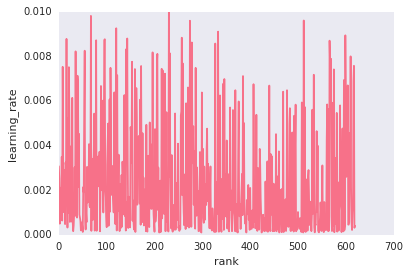

/home/mcherti/miniconda/envs/databoard-env/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


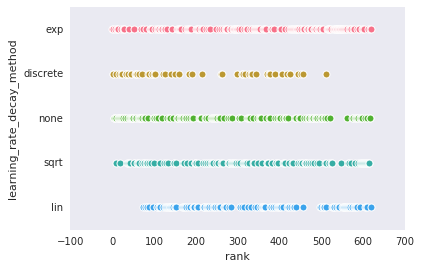

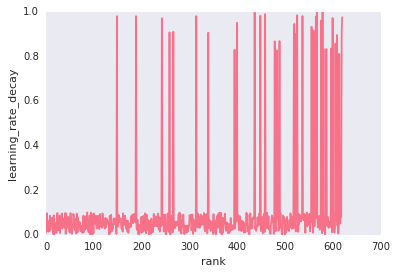

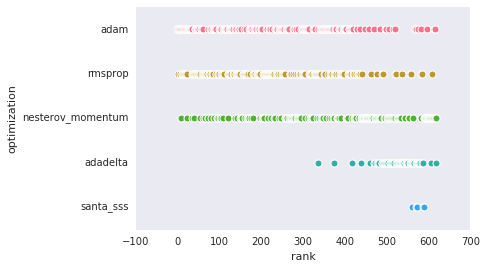

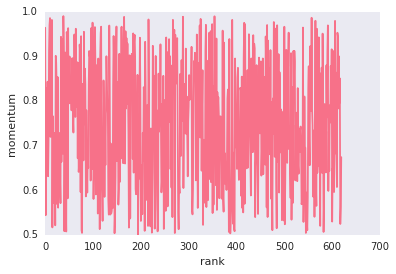

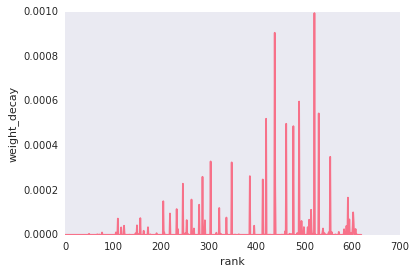

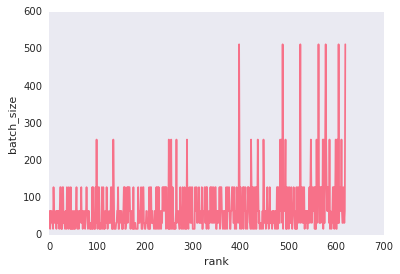

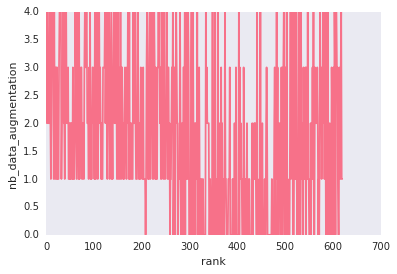

In [9]:
cols = ['learning_rate',
    'learning_rate_decay_method',    
    'learning_rate_decay',
    'optimization',
    'momentum',
    'weight_decay',
    'batch_size',
    'nb_data_augmentation']
for c in cols:
    vals = df_s['hp'].apply(lambda e:e[c])
    ranks = np.arange(len(vals))
    if type(vals[0])== unicode:
        a=pd.DataFrame({'rank': ranks, c: vals})
        sns.stripplot(x='rank', y=c, data=a)
    else:
        plt.plot(ranks, vals)
    plt.xlabel("rank")
    plt.ylabel(c)
    plt.show()

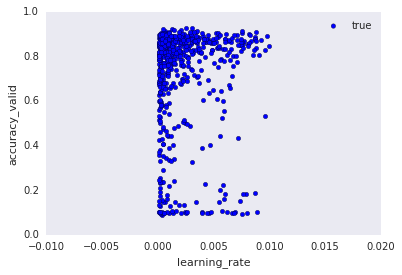

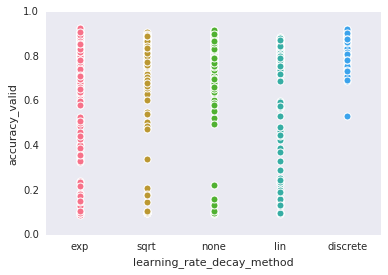

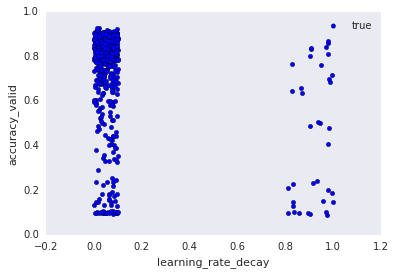

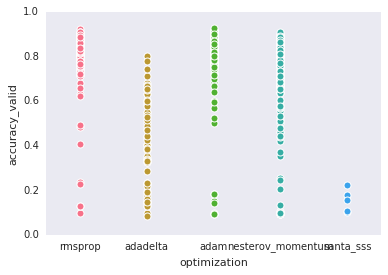

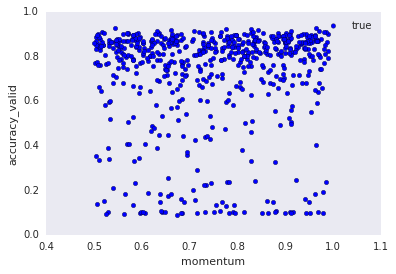

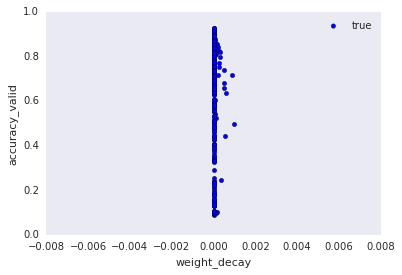

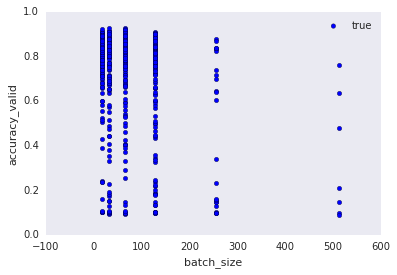

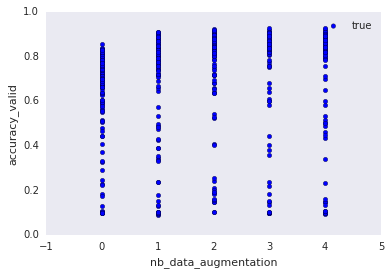

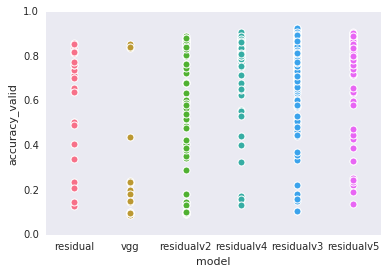

In [10]:
cols = [
    'learning_rate',
    'learning_rate_decay_method',    
    'learning_rate_decay',
    'optimization',
    'momentum',
    'weight_decay',
    'batch_size',
    'nb_data_augmentation',
    'model'
]
yname = "accuracy_valid"
for c in cols:
    xname = c
    x, y = [], []
    for e in experiments:
        hp = e["hp"]
        if c in hp:
            x.append(hp[c])
        else:
            x.append(e[c])
        y.append(np.max(e[yname]))
    if type(x[0]) == unicode:
        a=pd.DataFrame({xname: x, yname: y})
        sns.stripplot(x=xname, y=yname, data=a)
        plt.show()
    else:
        """
        import GPy
        fig = plt.figure()
        x = np.array(x)[:, None]
        y = np.array(y)[:, None]
        kern = GPy.kern.Matern32(input_dim=1 )
        gp = GPy.models.GPRegression(x, y, kern)
        gp.optimize()
        gp.plot()
        plt.xlabel(xname)
        plt.ylabel(yname)
        plt.legend()        
        plt.show()
        continue
        x_ = np.linspace(np.min(x), np.max(x), 100)
        y_, y_std_ = gp.predict(x_[:, None], return_std=True)
        plt.errorbar(x_, y_, yerr=y_std_, c='red', label="fit")

        """
        fig = plt.figure()
        plt.scatter(x, y, c='blue', label="true")
        #plt.xlim((np.min(x), np.max(x)))
        plt.legend()
        xname = c
        plt.xlabel(xname)
        plt.ylabel(yname)
        plt.show()

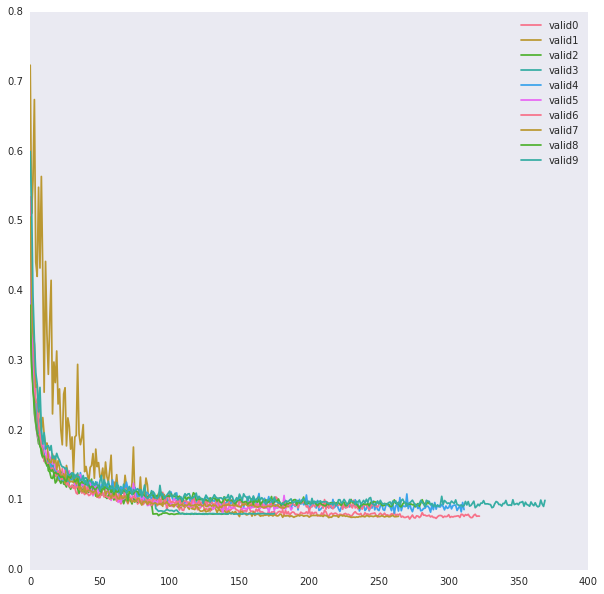

In [11]:
## best model learning curves (best according to validation)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
sns.set_palette("husl")
fig = plt.figure(figsize=(10, 10))
for best in range(0, 10):
    #plt.plot(1 - np.array(df_s['accuracy_train'].iloc[best]), label="train")
    plt.plot(df_s['error_valid'].iloc[best], label="valid{}".format(best))
    plt.legend()

In [14]:
df.sort_values(by="accuracy_valid_last", ascending=False)[["accuracy_valid_last", "accuracy_test", "model"]]

,accuracy_valid_last,accuracy_test,model
362,0.923327,0.804638,residualv3
585,0.923072,0.851806,residualv3
515,0.919838,0.908576,residualv3
522,0.919217,0.907434,residualv3
254,0.913673,0.218794,residualv3
580,0.910800,0.286300,residualv3
416,0.909471,0.884530,residualv3
513,0.909349,0.903121,residualv3
586,0.908133,0.899700,residualv3
543,0.908128,0.908978,residualv3


In [15]:
import pprint
print(df["accuracy_valid_max"].argmax())
e=experiments[df["accuracy_valid_max"].argmax()]
pprint.pprint(e["hp"])
pprint.pprint(e["hp_model"])
pprint.pprint(e["accuracy_test"])

585
{u'batch_size': 32,
 u'discrete_learning_divide': 10.0,
 u'discrete_learning_rate_epsilon': 0.0001,
 u'do_flip': True,
 u'l2_decay': 4.7331109334346396e-07,
 u'learning_rate': 0.003070729372355916,
 u'learning_rate_decay': 0.011499500064496515,
 u'learning_rate_decay_method': u'exp',
 u'max_epochs': 1000,
 u'momentum': 0.9638292993452588,
 u'nb_data_augmentation': 4,
 u'optimization': u'adam',
 u'patience_check_each': 1,
 u'patience_nb_epochs': 50,
 u'patience_threshold': 1,
 u'rotation_range': [0, 0],
 u'shear_range': [1, 1],
 u'translation_range': [-5, 5],
 u'valid_ratio': 0.15,
 u'weight_decay': 0.0,
 u'zoom_range': [1, 1]}
{u'f0': 32,
 u'f1': 16,
 u'f2': 64,
 u'f3': 64,
 u'fs0': 3,
 u'fs1': 3,
 u'fs2': 3,
 u'fs3': 3,
 u'nbg1': 5,
 u'nbg2': 5,
 u'nbg3': 5,
 u'nonlin': u'rectify',
 u'pg1': 2,
 u'pg2': 2,
 u'pg3': 2}
0.851805644132653


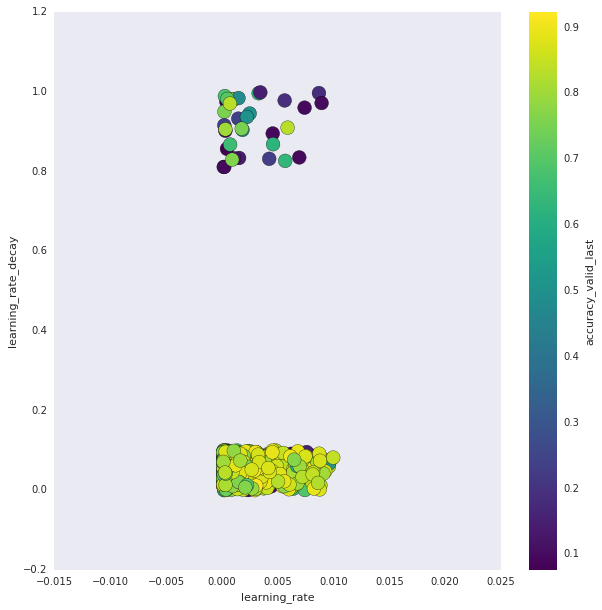

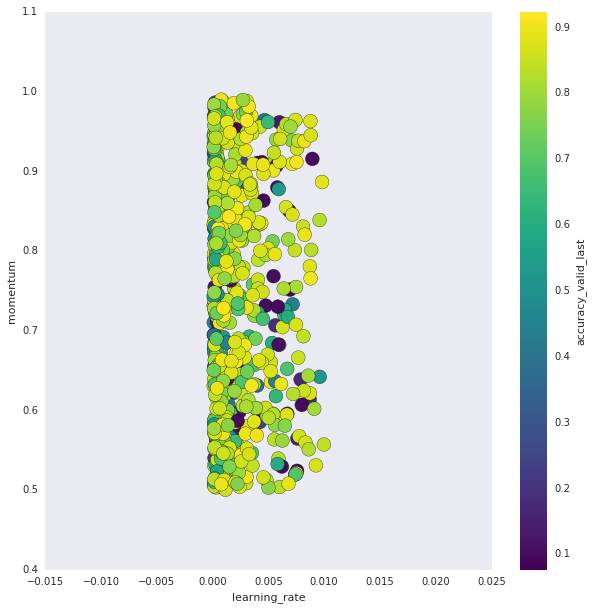

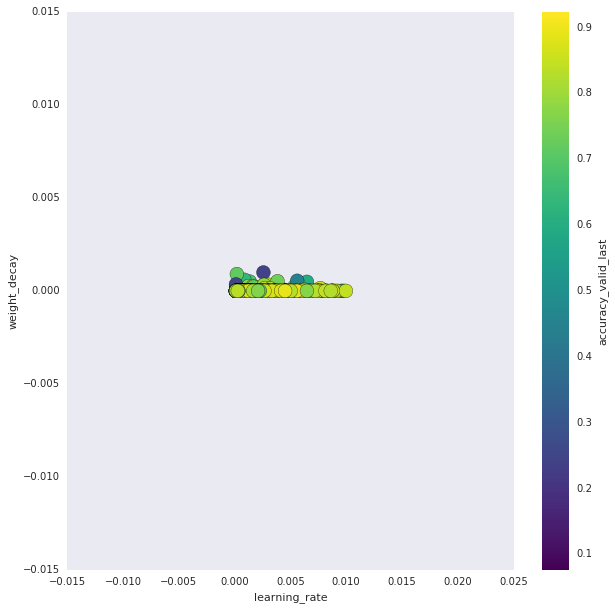

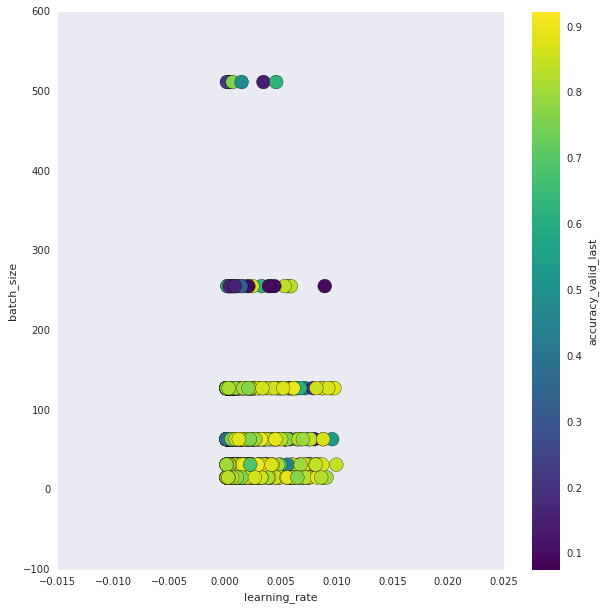

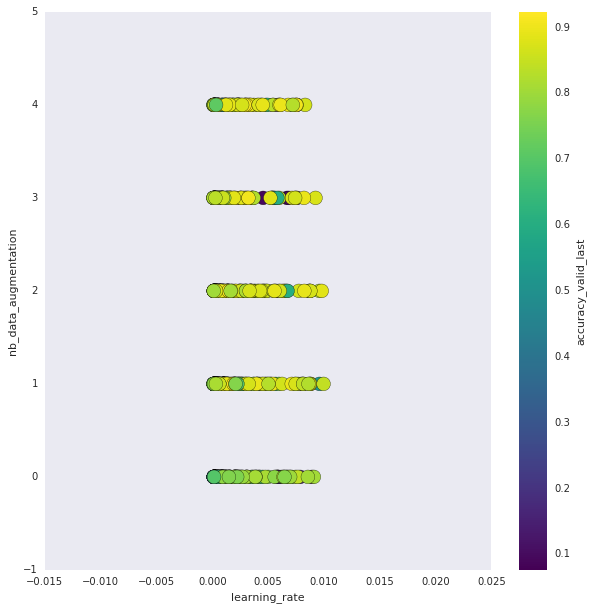

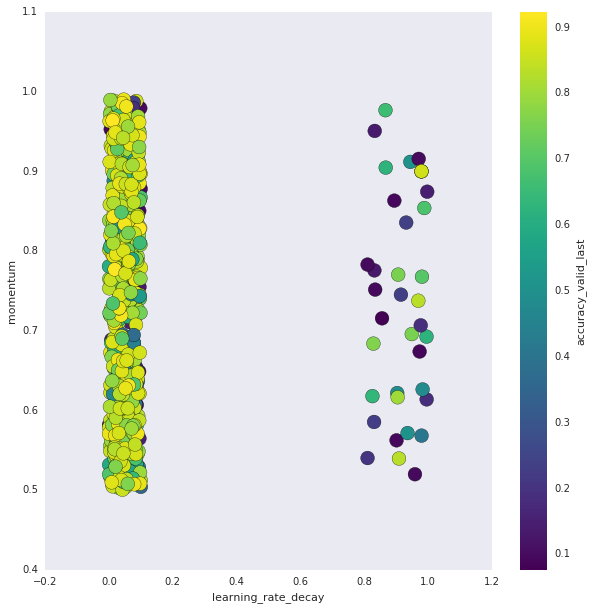

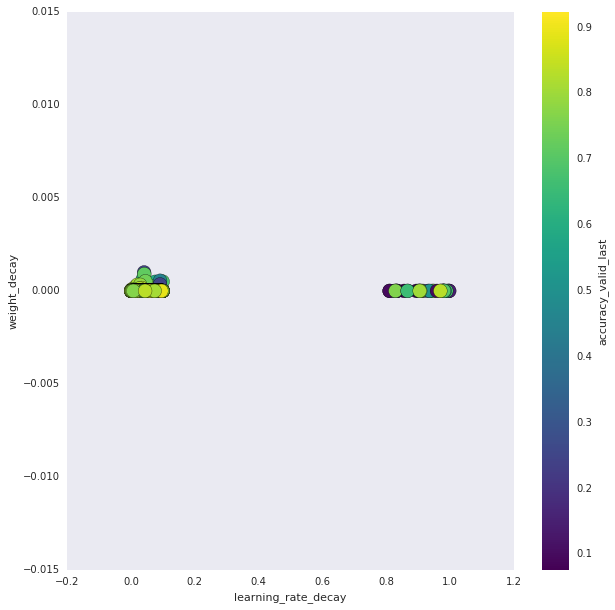

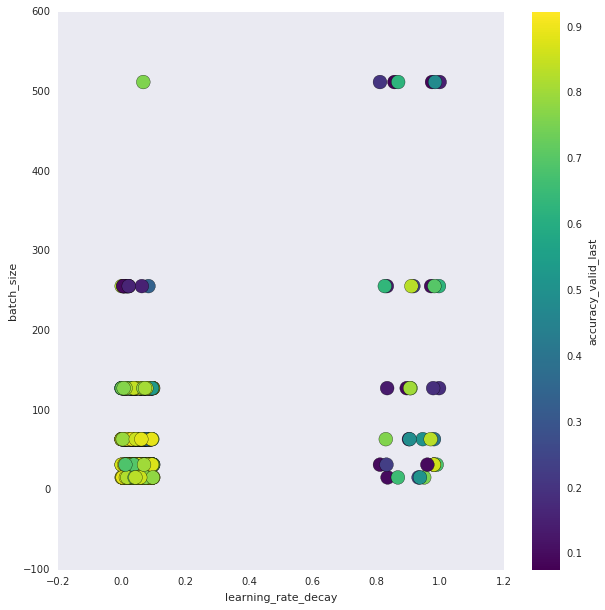

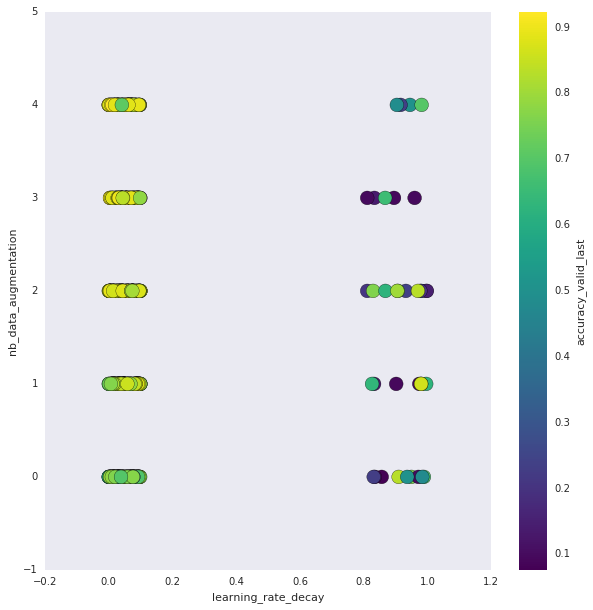

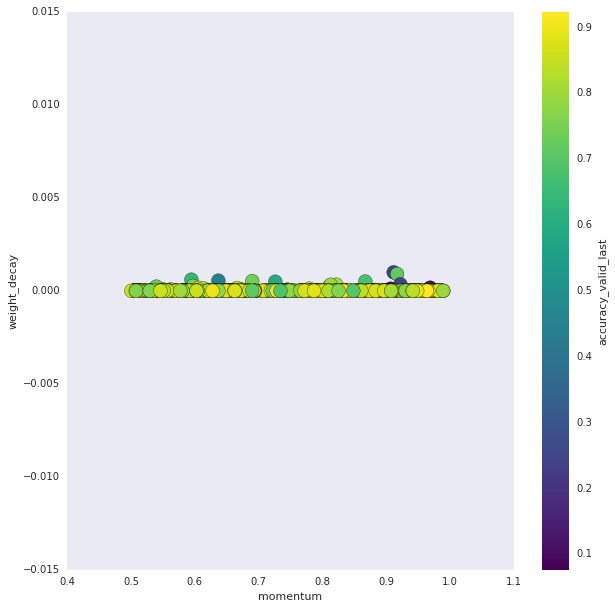

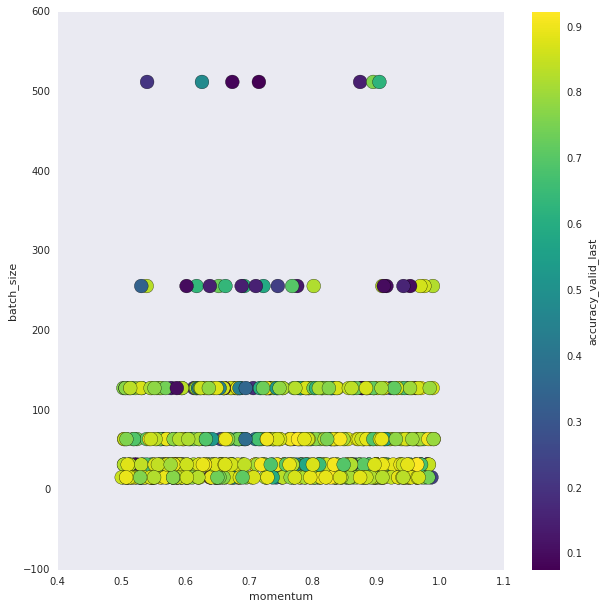

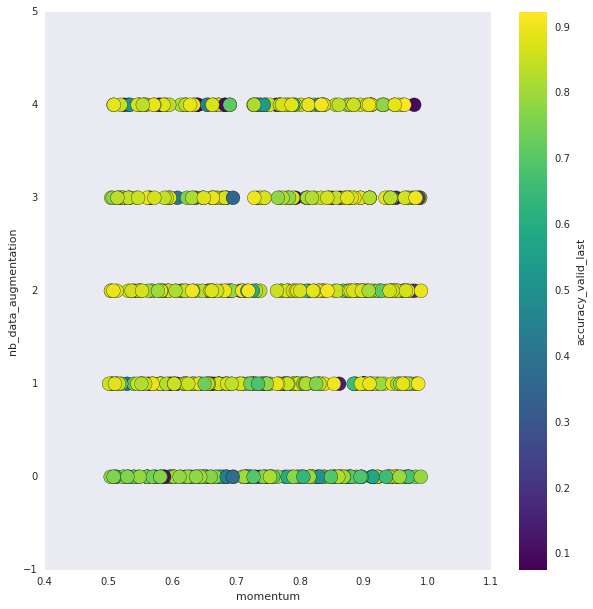

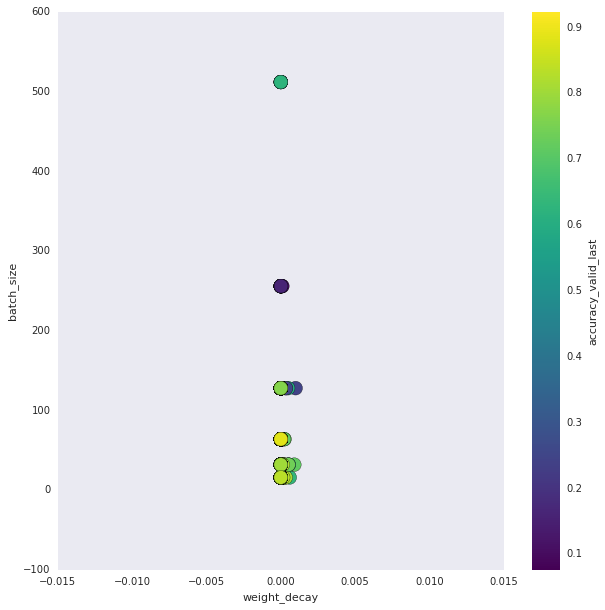

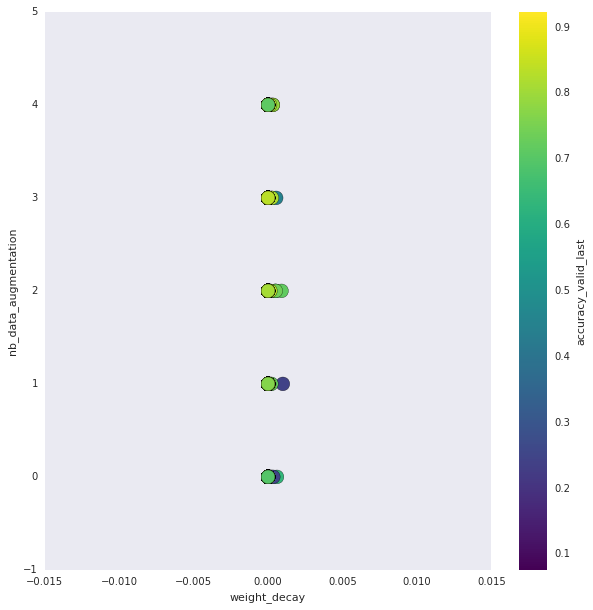

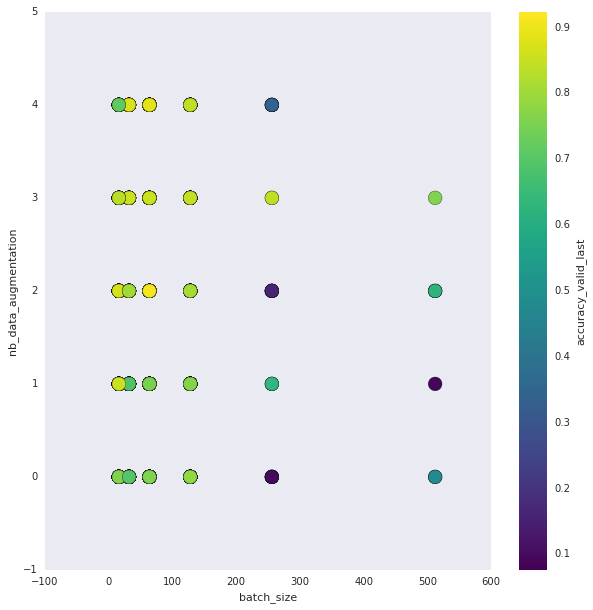

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.gaussian_process import GaussianProcess
import numpy as np
cols = [
    'learning_rate',
    #'learning_rate_decay_method',    
    'learning_rate_decay',
    #'optimization',
    'momentum',
    'weight_decay',
    'batch_size',
    'nb_data_augmentation',
    
]

wrt = 'accuracy_valid_last'

C = [c for c in cols if c != wrt]

cm = plt.cm.get_cmap('viridis')
for c1, c2 in combinations(C, 2):
    x = []
    y = []
    for e in experiments:
        x.append(e["hp"][c1])
        y.append(e["hp"][c2])
    fig = plt.figure(figsize=(10, 10))
    
    sc = plt.scatter((x), (y), c=(df[wrt]), cmap=cm, s=190)
    plt.colorbar(sc, label=wrt)
    plt.xlabel(c1)
    plt.ylabel(c2)
    plt.show()

# regression of hyper-parameters

In [41]:
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
def merge_dicts(*d):
    z = d[0].copy()
    for a in d[1:]:
        z.update(a)
    return z

X_list = [ 
    merge_dicts(e['hp'], e['hp_model'], 
                {'model': e['model']},
                {"accuracy_train_first": e["accuracy_train"][0]}) 
    for e in experiments
]    
X = pd.DataFrame(X_list)
print(X.columns)
yname = "accuracy_valid_last"
#yname = "duration"
y = [e[yname] for e in experiments]
y = np.array(y)
retain = [
    'batch_size', 
    'learning_rate', 
    'learning_rate_decay', 
    'learning_rate_decay_method', 
    'momentum',
    'nb_data_augmentation', 
    'optimization', 
    'weight_decay',
  #  'hp_model',
    'model',
    
#    u'f0', u'f1', u'f2', u'f3', u'fs0', u'fs1',
#    u'fs2', u'fs3', u'nbg1', u'nbg2', u'nbg3', u'nonlin',
#    u'pg1', u'pg2', u'pg3',
#    u'accuracy_train_first'
]
          
X = X[retain].T.to_dict().values()
vectorizer = DV( sparse = False )
vectorizer.fit(X)
X_v = vectorizer.transform(X)
names = vectorizer.feature_names_

Index([          u'accuracy_train_first',                     u'batch_size',
             u'discrete_learning_divide', u'discrete_learning_rate_epsilon',
                                  u'do1',                            u'do2',
                                  u'do3',                            u'do4',
                                  u'do5',                        u'do_flip',
                                  u'ds1',                            u'ds2',
                                   u'f0',                             u'f1',
                                   u'f2',                             u'f3',
                                  u'fs0',                            u'fs1',
                                  u'fs2',                            u'fs3',
                             u'l2_decay',                  u'learning_rate',
                  u'learning_rate_decay',     u'learning_rate_decay_method',
                           u'max_epochs',                          u'model',

In [45]:

from hp_toolkit.search import RandomSearch, DensityFitSearch
from hp_toolkit.hp import Param
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
def epsilon():
    t = 1
    while True:
        eps = 1. / t
        yield eps
        t += 1

hp = {
    "max_depth": Param(initial=1, interval=[1, 20], type='int'),
    "n_estimators": Param(initial=10, interval=[10, 300], type='int')
}

search = DensityFitSearch(hp, epsilon=epsilon, keep=10)
#search = RandomSearch(hp)

best_score = -np.inf

for i in range(10):
    
    params = search.sample_next()
    reg = RandomForestRegressor(n_jobs=1, **params)
    s = (-cross_val_score(reg, X_v, y, scoring='mean_absolute_error', cv=5, n_jobs=2))
    #score = norm.logpdf(s.mean(), loc=1, scale=s.std())
    score = -s.mean()
    search.update(params, -score)
    if score > best_score:
        print(best_score, score)
        best_params = params
        best_score = score
        print("best params : {}, mean error :{}".format(params, s.mean()))
        reg.fit(X_v, y)
        best_model = reg

(-inf, -0.093912061255764484)
best params : {'n_estimators': 254, 'max_depth': 17}, mean error :0.0939120612558


[u'batch_size', u'learning_rate', u'learning_rate_decay', u'learning_rate_decay_method=discrete', u'learning_rate_decay_method=exp', u'learning_rate_decay_method=lin', u'learning_rate_decay_method=none', u'learning_rate_decay_method=sqrt', u'model=residual', u'model=residualv2', u'model=residualv3', u'model=residualv4', u'model=residualv5', u'model=vgg', u'momentum', u'nb_data_augmentation', u'optimization=adadelta', u'optimization=adam', u'optimization=nesterov_momentum', u'optimization=rmsprop', u'optimization=santa_sss', u'weight_decay']


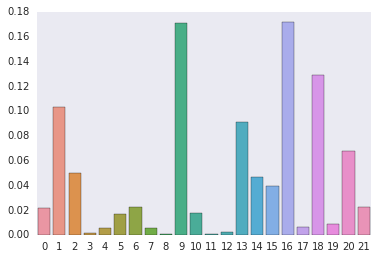

(0, 0.17167104107244782, u'optimization=adadelta')
(1, 0.17070938706616895, u'model=residualv2')
(2, 0.12921094499514491, u'optimization=nesterov_momentum')
(3, 0.10282884539562762, u'learning_rate')
(4, 0.09059517332102239, u'model=vgg')
(5, 0.067374238248490953, u'optimization=santa_sss')
(6, 0.04977078703923387, u'learning_rate_decay')
(7, 0.046692461818566199, u'momentum')
(8, 0.039139104497278462, u'nb_data_augmentation')
(9, 0.022574581969723392, u'learning_rate_decay_method=none')
(10, 0.022460866768020744, u'weight_decay')
(11, 0.021226596049648803, u'batch_size')
(12, 0.017583724960040903, u'model=residualv3')
(13, 0.016399573425083771, u'learning_rate_decay_method=lin')
(14, 0.009096080777505889, u'optimization=rmsprop')
(15, 0.0066480939650490666, u'optimization=adam')
(16, 0.0056542023431397923, u'learning_rate_decay_method=exp')
(17, 0.0054406704165085992, u'learning_rate_decay_method=sqrt')
(18, 0.0019880195378653149, u'model=residualv5')
(19, 0.0010836189955495228, u'lea

In [46]:
print(names)
sns.barplot(np.arange(len(best_model.feature_importances_)), best_model.feature_importances_)
plt.show()

feats, imps = zip(*sorted(zip(best_model.feature_importances_, names), reverse=True))
for idx, feat, imp in zip(range(len(feats)), feats, imps):
    print(idx, feat, imp)

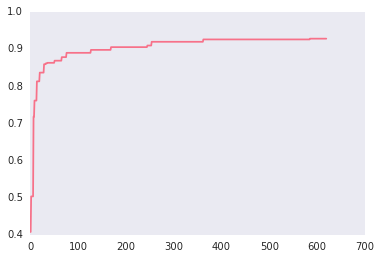

In [47]:
# as time goes
plt.plot(df['accuracy_valid_max'].cummax())